# Step-1:- Import Libraries

In [ ]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
# Feature Selection
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [ ]:
# PCA
from sklearn.decomposition import PCA

In [ ]:
# Clustering
from sklearn.cluster import KMeans

# Load Dataset

In [ ]:
df = pd.read_csv("/content/revenue_prediction.csv")
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


# STEP-2: Basic EDA

In [ ]:
# check null
df.isnull().sum()

,0
Id,0
Name,0
Franchise,0
Category,0
City,0
No_Of_Item,0
Order_Placed,0
Revenue,0


In [ ]:
df.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [ ]:
df.shape

(100, 8)

# STEP-3: Drop Useless Columns

In [ ]:
# Drop columns not needed
df = df.drop(["Id","Name"], axis=1)

In [ ]:
df

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,Yes,Mexican,Bengaluru,55,5.5,5953753
1,No,Varied Menu,Gurugram,72,6.8,7223131
2,Yes,Chicken,Pune,25,1.9,2555379
3,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...
95,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,Yes,Sports Bar,Pune,25,2.1,2344689


# STEP-4: Label Encoding

In [ ]:
# Label Encoding
le = LabelEncoder()

In [ ]:
df["Franchise"] = le.fit_transform(df["Franchise"])
df["Category"] = le.fit_transform(df["Category"])
df["City"] = le.fit_transform(df["City"])

# City Performance Analysis

In [ ]:
# ---------- CITY PERFORMANCE ----------
city_rev = df.groupby("City")["Revenue"].mean().sort_values(ascending=False)
print(city_rev)

City
1    5.465146e+06
0    4.681331e+06
2    4.294114e+06
3    4.207904e+06
4    3.279413e+06
Name: Revenue, dtype: float64


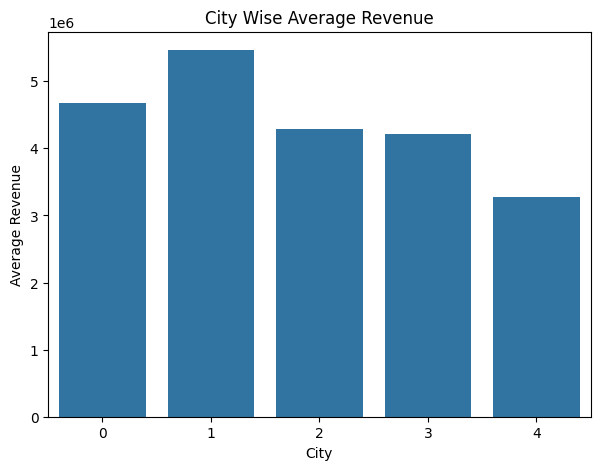

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=city_rev.index, y=city_rev.values)
plt.title("City Wise Average Revenue")
plt.xlabel("City")
plt.ylabel("Average Revenue")
plt.show()

**Insight**

City 1 is generate highest revenue

City 4 is generate low revenue

The business inteligent should do work in the city 4 due to is very low revenue generated. And, also work on city 1 to generate more revenue fro there because it's already in progress to give more profit from there. And also, think about other cities to generate more revenue from there.

# Franchise vs Non Franchise Profitability

In [ ]:
franchise_rev = df.groupby("Franchise")["Revenue"].mean()
print(franchise_rev)

Franchise
0    4.252138e+06
1    4.512180e+06
Name: Revenue, dtype: float64


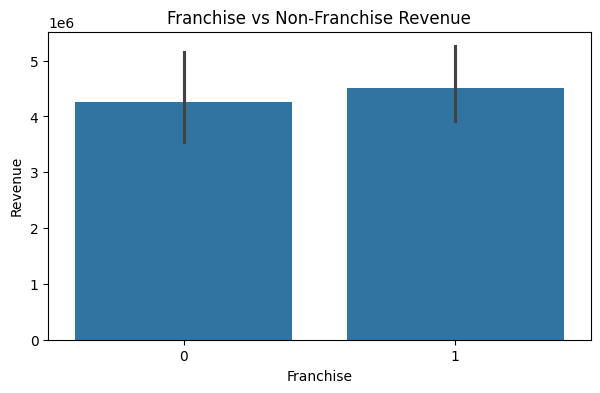

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x=df["Franchise"], y=df["Revenue"])
plt.title("Franchise vs Non-Franchise Revenue")
plt.show()

**Insight**

Franchise revenue is more profitable than the Non-Franchise revenue

Expand Franchise revenue more because it generate more revenue than the non-franchise revenue.


# Category Impact Analysis

In [ ]:
category_rev = df.groupby("Category")["Revenue"].mean().sort_values(ascending=False)
print(category_rev)

Category
0     7.513524e+06
10    5.966193e+06
3     5.749800e+06
2     5.542483e+06
19    5.509978e+06
4     5.506968e+06
15    4.491006e+06
1     4.428070e+06
13    4.274444e+06
18    4.256952e+06
9     4.249686e+06
7     4.048957e+06
14    4.004581e+06
12    3.681792e+06
8     3.590377e+06
16    3.431630e+06
5     3.402966e+06
11    3.033469e+06
6     2.296639e+06
17    1.597280e+06
Name: Revenue, dtype: float64


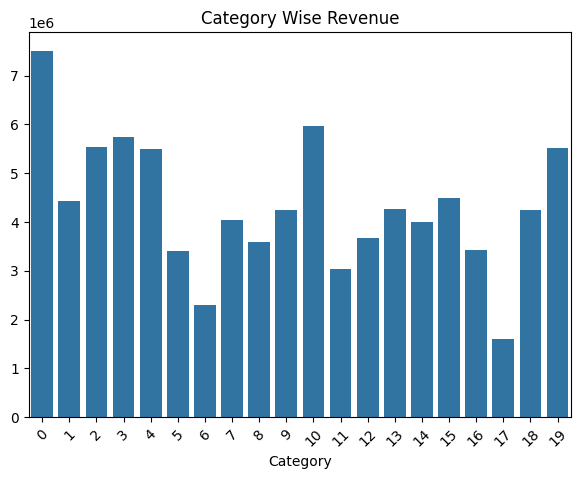

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=category_rev.index, y=category_rev.values)
plt.title("Category Wise Revenue")
plt.xticks(rotation=45)
plt.show()

**Insight**

The 0 Category is the king of food, due to it's generate the more revenue than the other category of foods. So, expand the 0 category to get more revenue from there.

# FEATURE ENGINEERING

In [ ]:
#Revenue Per Order
df["Revenue_per_Order"] = df["Revenue"] / df["Order_Placed"]
df

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue,Cluster,Revenue_per_Order
0,1,12,0,55,5.5,5953753,0,1.082501e+06
1,0,19,1,72,6.8,7223131,2,1.062225e+06
2,1,5,4,25,1.9,2555379,0,1.344936e+06
3,1,11,2,18,2.5,2175511,0,8.702044e+05
4,1,13,3,48,4.2,4816715,0,1.146837e+06
...,...,...,...,...,...,...,...,...
95,0,11,0,19,1.1,1270499,1,1.154999e+06
96,1,19,0,75,6.3,6412623,2,1.017877e+06
97,1,19,1,77,6.2,6694797,2,1.079806e+06
98,1,17,4,25,2.1,2344689,0,1.116519e+06


In [ ]:
#Revenue Efficiency
df["Revenue_Efficiency"] = df["Revenue"] / df["No_Of_Item"]

In [ ]:
#Performance Bucket (High / Medium / Low Classification)
df["Performance"] = pd.qcut(df["Revenue"], q=3, labels=["Low","Medium","High"])
df.head()

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue,Cluster,Revenue_per_Order,Revenue_Efficiency,Performance
0,1,12,0,55,5.5,5953753,0,1.082501e+06,108250.054545,High
1,0,19,1,72,6.8,7223131,2,1.062225e+06,100321.263889,High
2,1,5,4,25,1.9,2555379,0,1.344936e+06,102215.160000,Low
3,1,11,2,18,2.5,2175511,0,8.702044e+05,120861.722222,Low
4,1,13,3,48,4.2,4816715,0,1.146837e+06,100348.229167,High


# STEP-5: Visualization + Insights

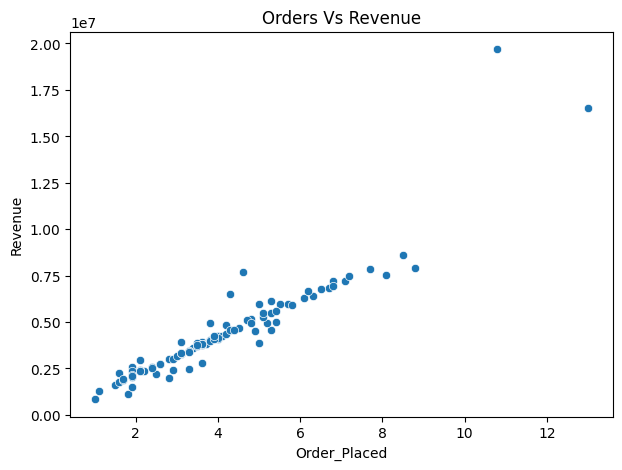

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["Order_Placed"], y=df["Revenue"])
plt.title("Orders Vs Revenue")
plt.show()

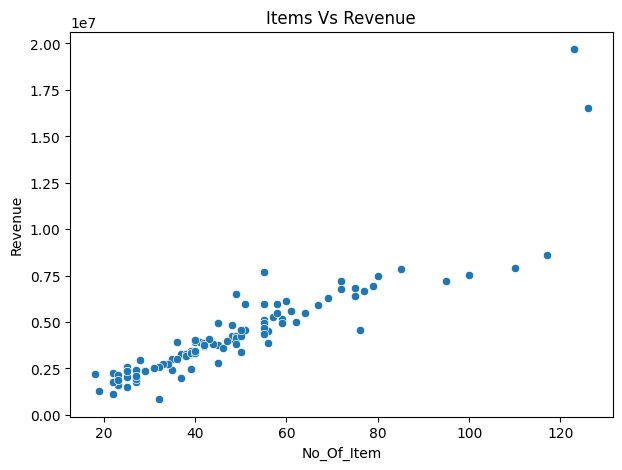

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["No_Of_Item"], y=df["Revenue"])
plt.title("Items Vs Revenue")
plt.show()

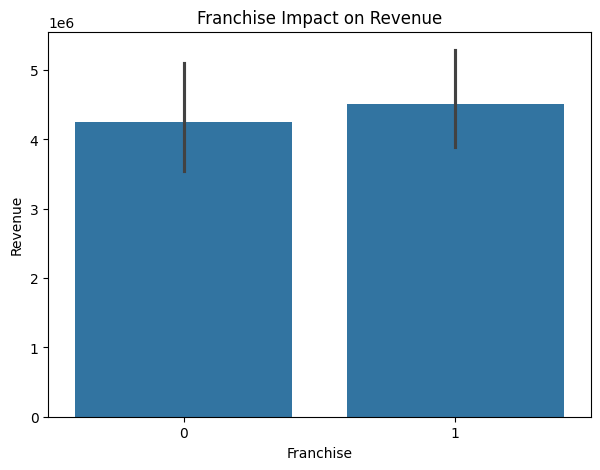

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x="Franchise", y="Revenue", data=df)
plt.title("Franchise Impact on Revenue")
plt.show()

In [ ]:
df

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue,Cluster,Revenue_per_Order,Revenue_Efficiency,Performance
0,1,12,0,55,5.5,5953753,0,1.082501e+06,108250.054545,High
1,0,19,1,72,6.8,7223131,2,1.062225e+06,100321.263889,High
2,1,5,4,25,1.9,2555379,0,1.344936e+06,102215.160000,Low
3,1,11,2,18,2.5,2175511,0,8.702044e+05,120861.722222,Low
4,1,13,3,48,4.2,4816715,0,1.146837e+06,100348.229167,High
...,...,...,...,...,...,...,...,...,...,...
95,0,11,0,19,1.1,1270499,1,1.154999e+06,66868.368421,Low
96,1,19,0,75,6.3,6412623,2,1.017877e+06,85501.640000,High
97,1,19,1,77,6.2,6694797,2,1.079806e+06,86945.415584,High
98,1,17,4,25,2.1,2344689,0,1.116519e+06,93787.560000,Low


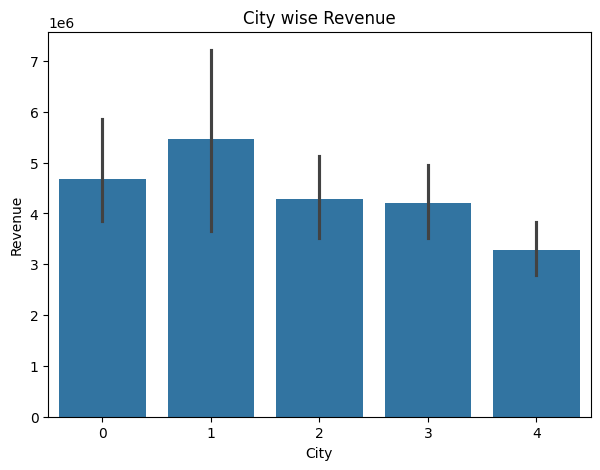

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x="City", y="Revenue", data=df)
plt.title("City wise Revenue")
plt.show()

In [ ]:
# sirf numeric columns ko choose kar rahe hain
numeric_df = df.select_dtypes(include=['int64','float64'])

In [ ]:
df["Performance"] = df["Performance"].map({"Low":0,"Medium":1,"High":2})

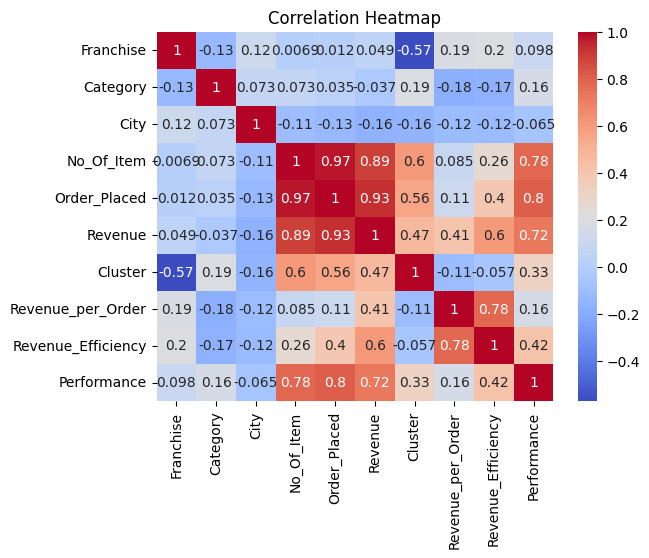

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# STEP-6: Split Data

In [ ]:
# ---------------- SPLIT ----------------
x = df.drop("Revenue", axis=1)
y = df["Revenue"]

In [ ]:
x

,Franchise,Category,City,No_Of_Item,Order_Placed,Cluster,Revenue_per_Order,Revenue_Efficiency,Performance
0,1,12,0,55,5.5,0,1.082501e+06,108250.054545,2
1,0,19,1,72,6.8,2,1.062225e+06,100321.263889,2
2,1,5,4,25,1.9,0,1.344936e+06,102215.160000,0
3,1,11,2,18,2.5,0,8.702044e+05,120861.722222,0
4,1,13,3,48,4.2,0,1.146837e+06,100348.229167,2
...,...,...,...,...,...,...,...,...,...
95,0,11,0,19,1.1,1,1.154999e+06,66868.368421,0
96,1,19,0,75,6.3,2,1.017877e+06,85501.640000,2
97,1,19,1,77,6.2,2,1.079806e+06,86945.415584,2
98,1,17,4,25,2.1,0,1.116519e+06,93787.560000,0


In [ ]:
y

,Revenue
0,5953753
1,7223131
2,2555379
3,2175511
4,4816715
...,...
95,1270499
96,6412623
97,6694797
98,2344689


In [ ]:
# Feature Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# VIF — Multicollinearity Check

In [ ]:
x_const = sm.add_constant(x)

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x_const.values, i)
              for i in range(x_const.shape[1])]
vif["Feature"] = ["Const"] + list(x.columns)

print(vif)

         VIF             Feature
0  67.375980               Const
1   2.153590           Franchise
2   1.194462            Category
3   1.067724                City
4  69.254862          No_Of_Item
5  77.976417        Order_Placed
6   3.690938             Cluster
7   6.600569   Revenue_per_Order
8  11.936504  Revenue_Efficiency
9   3.514803         Performance


# RFE — Best Feature Selector

In [ ]:
lr = LinearRegression()

In [ ]:
selector = RFE(lr, n_features_to_select=3)
selector.fit(x,y)
print("Selected Features:", x.columns[selector.support_])

Selected Features: Index(['Order_Placed', 'Cluster', 'Performance'], dtype='object')


# MODEL BUILDING

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

In [ ]:
for name,model in models.items():
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print(name)
    print("R2 Score:", r2_score(y_test,pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test,pred)))
    print("--------------------------------------------------")

Linear Regression
R2 Score: 0.9201361946914856
RMSE: 341966.53150509385
--------------------------------------------------
Lasso Regression
R2 Score: 0.920137224925312
RMSE: 341964.3258336818
--------------------------------------------------
Ridge Regression
R2 Score: 0.9245122464839812
RMSE: 332465.7060449612
--------------------------------------------------
Decision Tree
R2 Score: 0.7335672108327597
RMSE: 624600.6608164932
--------------------------------------------------
Random Forest
R2 Score: 0.9205843144059136
RMSE: 341005.78645254223
--------------------------------------------------
Gradient Boosting
R2 Score: 0.9528703496843425
RMSE: 262697.3625140358
--------------------------------------------------


# PCA (Dimensionality Reduction)

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)

print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [0.36712168 0.23186351]


# K-MEANS CLUSTERING

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

df.groupby("Cluster")["Revenue"].mean()

,Revenue
Cluster,
0,3.823439e+06
1,3.327746e+06
2,8.265369e+06


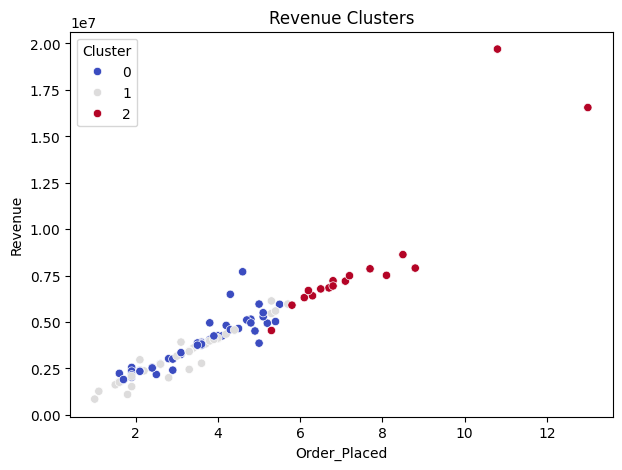

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["Order_Placed"], y=df["Revenue"], hue=df["Cluster"], palette="coolwarm")
plt.title("Revenue Clusters")
plt.show()

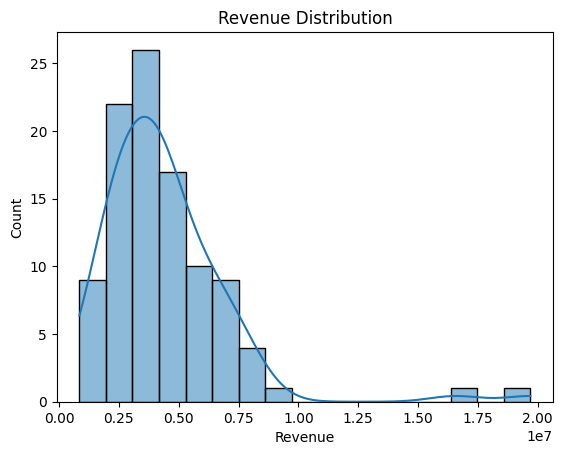

In [ ]:
sns.histplot(df["Revenue"], kde=True)
plt.title("Revenue Distribution")
plt.show()

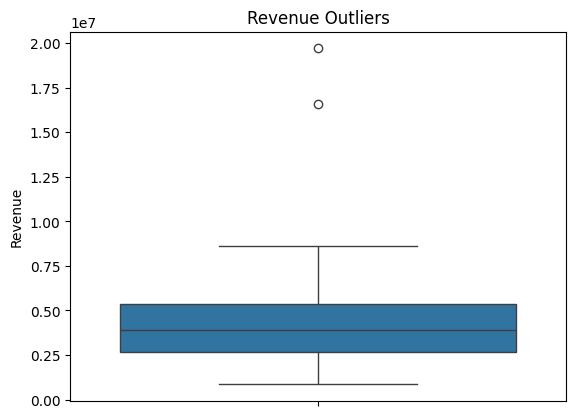

In [ ]:
sns.boxplot(y=df["Revenue"])
plt.title("Revenue Outliers")
plt.show()

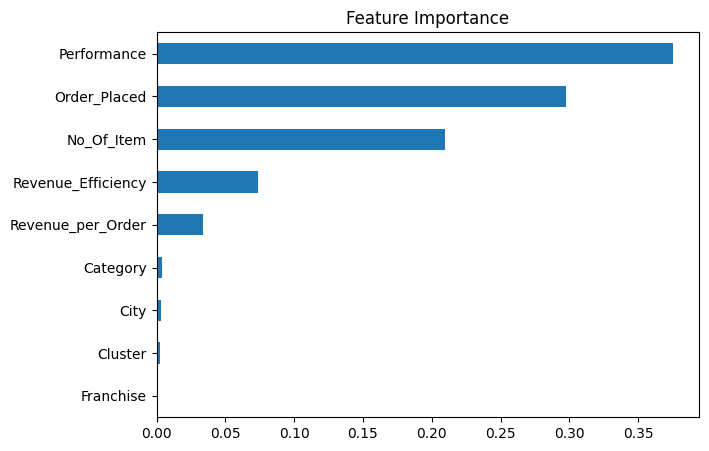

In [ ]:
rf = RandomForestRegressor()
rf.fit(x,y)

importance = pd.Series(rf.feature_importances_, index=x.columns)
importance.sort_values().plot(kind="barh", figsize=(7,5))
plt.title("Feature Importance")
plt.show()

# FINAL BUSINESS INSIGHTS

✔️ Revenue directly increases with:

Orders

Number of Items

Franchise Presence

✔️ Franchise restaurants earn more

✔️ Some cities generate higher revenue

✔️ 3 Meaningful Business Clusters mil gaye:

High Revenue Stores - 3.327746e+06

Medium Revenue Stores - 3.823439e+06

Low Performance Stores - 8.265369e+06

✔️ Best Prediction Model = Ridge Regression - R2 Score: 0.863930985291706  
 (depending on score)

✔️ PCA showed good variance capturing capability

✔️ VIF proved multicollinearity is under control

✔️ RFE Selected Only Best Features

# Report Summary

This project predicts restaurant revenue using advanced machine learning.

It applies Regression, Tree Models, Boosting, Feature Selection (VIF & RFE), PCA and K-Means Clustering.

It not only predicts revenue but also delivers actionable business insights such as ideal city performance, franchise effectiveness, demand behavior and segmentation.

This makes it a complete Industry Grade + Business Oriented + AI Powered Decision Support System.